# Load the CSV file into a Pandas DataFrame

In [1]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import numpy as np
essay_ids = range(1,7)
threshold=1
data_path = "asap-aes/"
org = pd.read_excel(data_path+"training_set_rel3.xlsx")
domains = ['domain1', 'domain2']

In [2]:
def read_set(essay_id):
    df = pd.read_csv(data_path+"results_gpt/EssaySet"+str(essay_id)+"_assessment_results_by_rubric.csv")
    if essay_id==1:
        df['domain1_score']= df['domain1_score']//2
        df['domain1_score'].head(5)
    return df

In [3]:
df_results = pd.DataFrame(columns=['Essay Set', 'No.Instances','Mean', 'Min', 'Max', 'No.Instances_gpt','Mean_gpt', 'Min_gpt', 'Max_gpt' ])
# Loop over each CSV file and read the DataFrame from the file
for i in essay_ids:
    df_org = org[org['essay_set'] == i]
    df_gpt = read_set(essay_id=i)
    for domain in domains:
        if (domain+'_score' in df_gpt.columns):
            score_org = df_org[[domain+'_score']]
            score_gpt = df_gpt[[domain+'_Score_gpt']]    
            # Calculate the mean, max, and count
            min = score_org.min()[0]
            mean = score_org.mean()[0].round(2)
            max = score_org.max()[0]
            count = score_org.count()[0]
            min1 = score_gpt.min()[0]
            mean1 = score_gpt.mean()[0].round(2)
            max1 = score_gpt.max()[0]
            count1 = score_gpt.count()[0]
            # Add the results to the DataFrame
            df_results.loc[str(i)+str(domain)] = [f'EssaySet {i}: {domain}', count,mean, min, max, count1,mean1, min1, max1]
df_results.to_csv(data_path+"reports_graphs/Report for EssaySets.csv", index=False)
df_results.to_excel(data_path+"reports_graphs/Report for EssaySets.xlsx", index=False)
# Print the results
df_results.head(8)

,Essay Set,No.Instances,Mean,Min,Max,No.Instances_gpt,Mean_gpt,Min_gpt,Max_gpt
1domain1,EssaySet 1: domain1,1783,8.53,2.0,12.0,1536,2.27,1.0,16.0
2domain1,EssaySet 2: domain1,1800,3.42,1.0,6.0,1726,3.26,1.0,5.0
2domain2,EssaySet 2: domain2,1800,3.33,1.0,4.0,1575,2.21,1.0,4.0
3domain1,EssaySet 3: domain1,1726,1.85,0.0,3.0,1691,1.40,0.0,4.0
4domain1,EssaySet 4: domain1,1771,1.43,0.0,3.0,1733,1.62,0.0,3.0
5domain1,EssaySet 5: domain1,1805,2.41,0.0,4.0,1804,2.62,1.0,4.0
6domain1,EssaySet 6: domain1,1800,2.72,0.0,4.0,1775,2.94,1.0,4.0


# print deviations

In [4]:
for essay_id in essay_ids:
    df = read_set(essay_id)
    # Calculate the difference between the actual and predicted scores
    for domain in domains:
        if (domain+'_Score_gpt' in df.columns):
            df.dropna(subset=[domain+'_Score_gpt'], inplace=True)
            df[domain+ 'Difference'] = abs(df[domain+'_score'] - df[domain+'_Score_gpt'])
            print(f"Essayset{essay_id} {domain} has {len(df[domain+ 'Difference'])} instances" )
            # Filter the DataFrame to only include rows where the difference is greater than 10
            deviations = df[df[domain+'Difference'] > threshold]
            print("\t"+str(round(len(deviations)/len(df)*100)) + f"% results are daviating for {domain} and the count is: " +str(len(deviations)))
            # Print the rows where the difference is greater than 10
    deviations.to_csv(data_path+"reports_graphs/EssaySet"+str(essay_id)+"_deviations.csv", index=False)

Essayset1 domain1 has 1536 instances
	75% results are daviating for domain1 and the count is: 1150
Essayset2 domain1 has 1726 instances
	4% results are daviating for domain1 and the count is: 72
Essayset2 domain2 has 1562 instances
	25% results are daviating for domain2 and the count is: 395
Essayset3 domain1 has 1691 instances
	10% results are daviating for domain1 and the count is: 169
Essayset4 domain1 has 1733 instances
	4% results are daviating for domain1 and the count is: 69
Essayset5 domain1 has 1804 instances
	6% results are daviating for domain1 and the count is: 112
Essayset6 domain1 has 1775 instances
	5% results are daviating for domain1 and the count is: 89


# Plot pie graphs

In [5]:
# Define a function that creates a pie chart of essay scores and returns the subplot
def create_pie_chart(title, scores, graph_path):
    # Create a figure with three subplots
    cmap_actual = plt.get_cmap('Pastel1')
    counts = scores.value_counts()
    labels = counts.index
    # labels = ['4', '3', '2', '1']
    values = counts.values
    explode = [0.2 if c < 20 else 0 for c in values]
    cmap_actual = plt.get_cmap('Pastel1')
    plt.figure(figsize=(5,4))
    plt.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, colors=cmap_actual(range(len(labels))),
                              shadow = True, 
                              wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'},
       textprops={'size': 12})
    plt.title(title,fontsize=10)
    plt.legend()
    plt.axis('equal')
    plt.legend()
    # Adjust the plot layout to prevent labels from overlapping with the border
    plt.tight_layout()
    plt.savefig(graph_path+"line.png")
    plt.show()

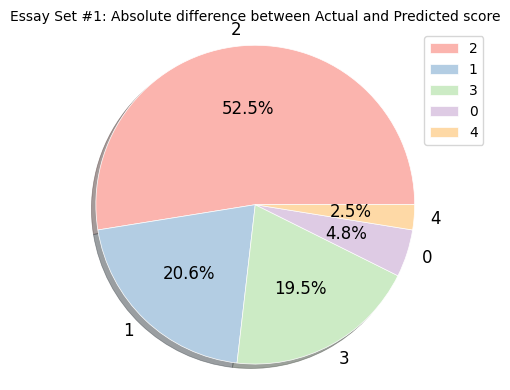

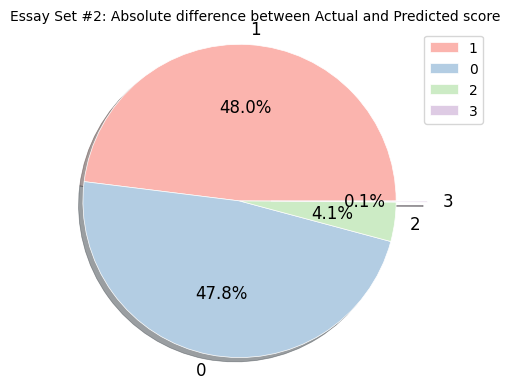

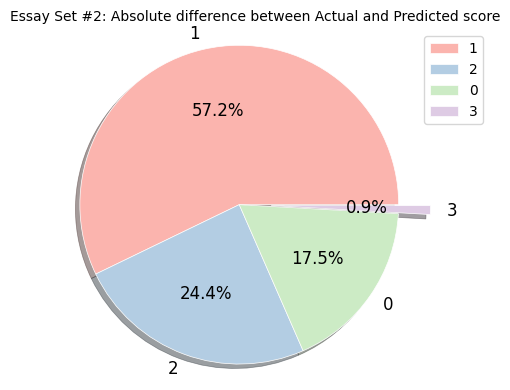

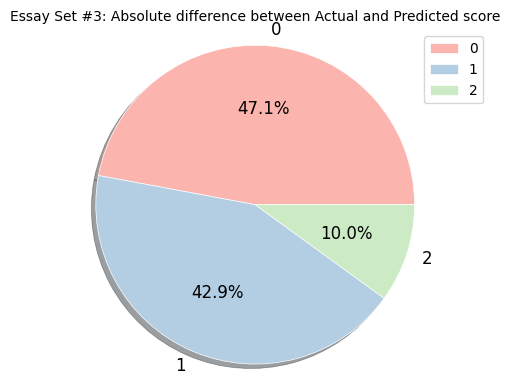

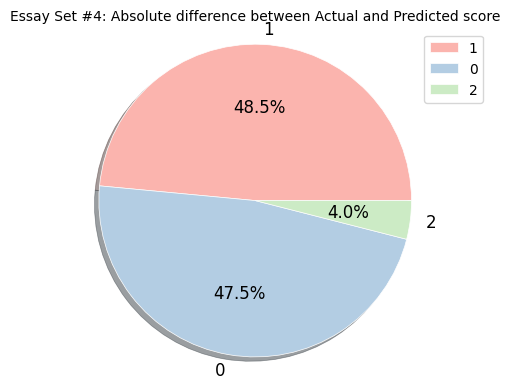

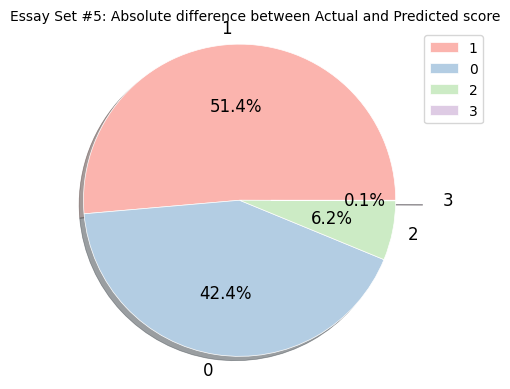

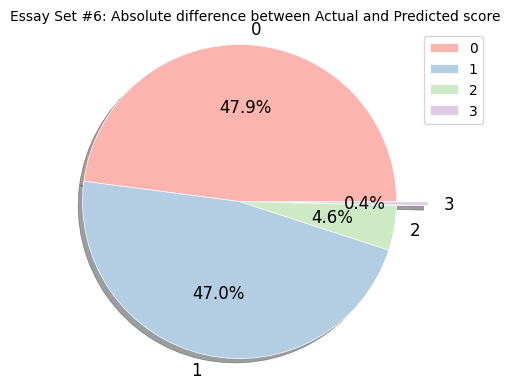

In [8]:
for essay_id in essay_ids:
    df = read_set(essay_id)
    for domain in domains:
        if domain+'_Score_gpt' in df.columns:
    # # Plot the actual scores as a pie chart in the first subplot
            df.dropna(subset=[domain+'_Score_gpt'], inplace=True)
            df.dropna(subset=[domain+'_score'], inplace=True)
            
            actual_scores = df[domain+'_score'].astype(int)
            predicted_scores = df[domain+'_Score_gpt'].astype(int)
            m_predicted_scores = [score//4 if score > 6 else score for score in predicted_scores]
            difference = abs(actual_scores-m_predicted_scores)
            # domain = "Language Convensions"
            title = f"Essay Set #{essay_id}: Absolute difference between Actual and Predicted score"
            graph_path = data_path+"reports_graphs/Pie_EssaySet"+str(essay_id)+"_"+domain+"_"


            create_pie_chart(title, difference, graph_path=graph_path)

# Plot Subgraphs

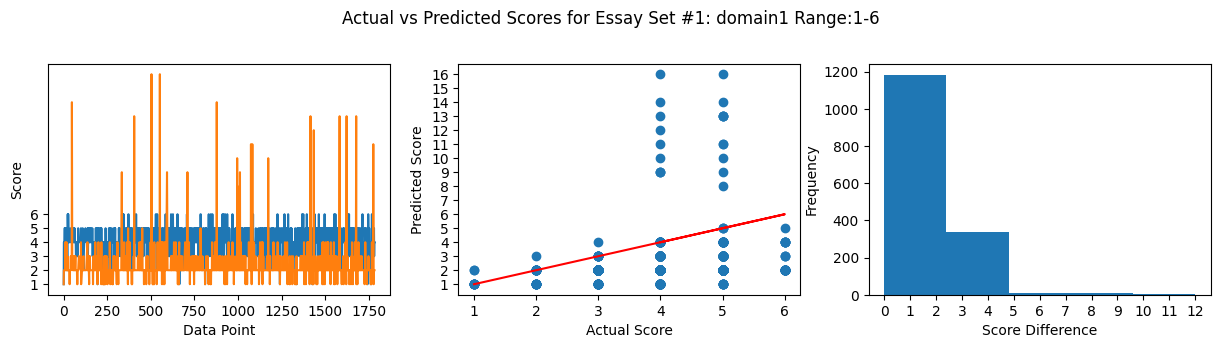

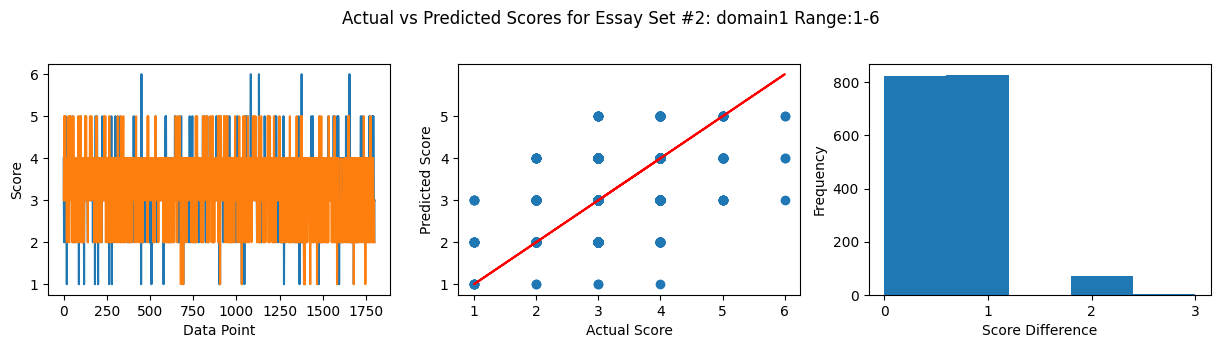

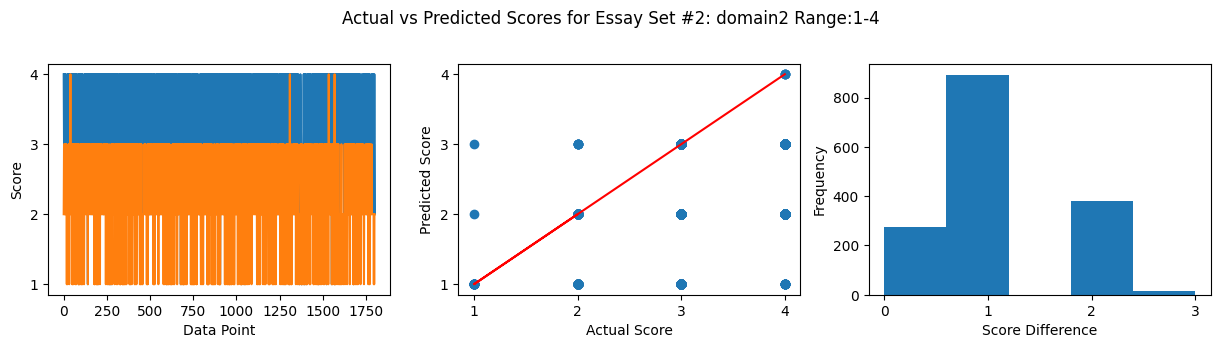

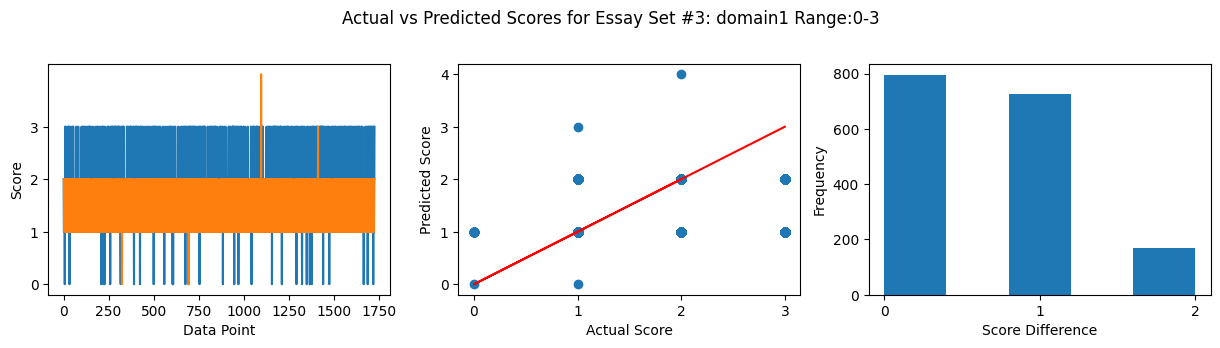

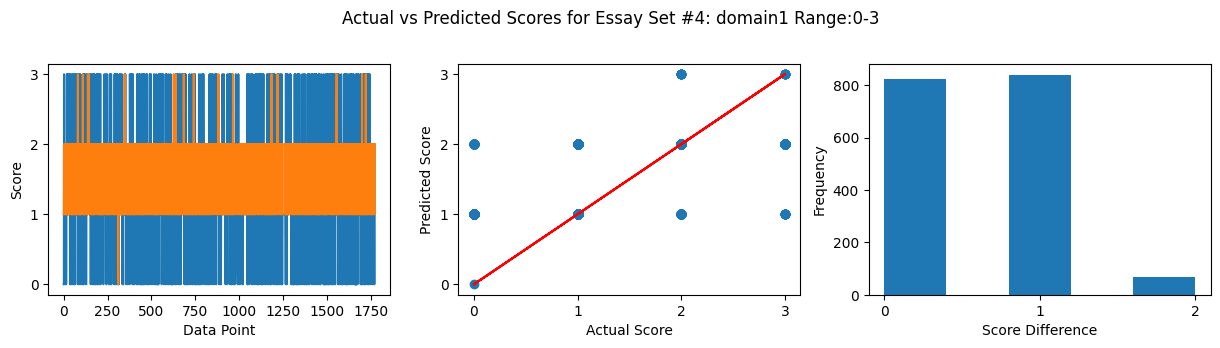

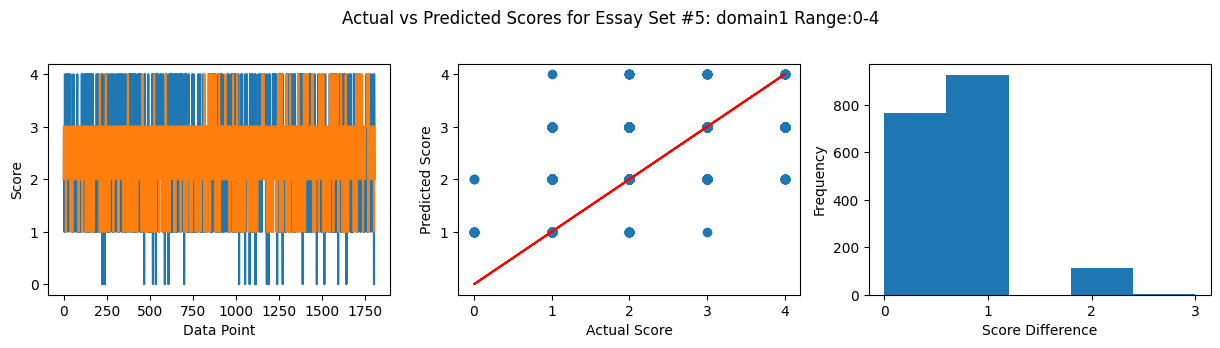

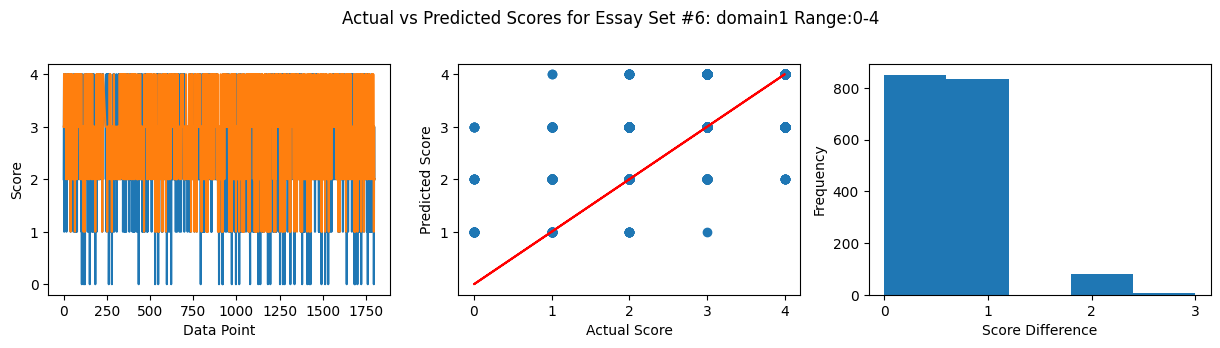

In [7]:
# Draw subplots
for essay_id in essay_ids:
    df = read_set(essay_id)
    for domain in domains:
    # # Plot the actual scores as a pie chart in the first subplot
        if domain+'_score' in df.columns:
            df.dropna(subset=[domain+'_Score_gpt'], inplace=True)
            actual_scores = df[domain+'_score']
            predicted_scores = df[domain+'_Score_gpt']
            difference = abs(actual_scores-predicted_scores)

            # domain = "Language Convensions"
            title = f"Actual vs Predicted Scores for Essay Set #{essay_id}: {domain} Range:{int(actual_scores.min())}-{int(actual_scores.max())}"
            graph_path = data_path+"reports_graphs/EssaySet"+str(essay_id)+"_"+domain+"_"
            # Create a figure with three subplots

            # Create a figure with three subplots
            fig, axs = plt.subplots(1, 3, figsize=(15,3))
            axs[0].plot(actual_scores, label='Actual Score')
            axs[0].plot(predicted_scores, label='Predicted Score')
            axs[0].set_xlabel('Data Point')
            axs[0].set_ylabel('Score')
            axs[0].set_yticks(range(int(actual_scores.min()), int(actual_scores.max()+1)))
            # axs[1].set_title(title)

            axs[1].scatter(actual_scores, predicted_scores)
            axs[1].plot(actual_scores, actual_scores, color='red')
            axs[1].set_xlabel('Actual Score')
            axs[1].set_xticks(range(int(actual_scores.min()), int(actual_scores.max()+1)))
            axs[1].set_ylabel('Predicted Score')
            axs[1].set_yticks(range(int(predicted_scores.min()), int(predicted_scores.max()+1)))

            
            axs[2].hist(difference, bins=5)
            # Add labels and title
            axs[2].set_xlabel('Score Difference')
            axs[2].set_ylabel('Frequency')
            # plt.xlim(left=0, right=5)
            # axs[0].set_title(title)
            axs[2].set_xticks(range(int(difference.min()), int(difference.max()+1)))
            # Set a title for the whole figure
            fig.suptitle(title, y= 1.06)
            plt.savefig(graph_path+".png", bbox_inches='tight')
            # Display the plot
            plt.show()


# Code for Pearson and Spearman's rank

In [8]:
# Code for Graph plot
def plot_pearson(actual_scores, predicted_scores, title, graph_path):
    corr, pval = pearsonr(actual_scores, predicted_scores)
    # Assuming actual_scores and predicted_scores are NumPy arrays or Python lists containing the actual and predicted scores, respectively
    scorr, spval = spearmanr(actual_scores, predicted_scores)
    print(f"Spearman's rank correlation coefficient: {scorr:.2f}")
    # print the correlation coefficient and p-value
    print("Pearson correlation coefficient: {:.2f}".format(corr))
    print("p-value: {:.3f}".format(pval))

    # plot the data and the linear regression line
    plt.figure(figsize=(5,4))
    plt.tight_layout()
    plt.scatter(actual_scores, predicted_scores)
    plt.plot(actual_scores, actual_scores, color='red')
    plt.title(f"{title}, Pearson correlation coefficient= {corr:.2f}", fontsize=10)
    plt.xlabel('Actual Score')
    plt.xticks(range(int(actual_scores.min()), int(actual_scores.max()+1)))
    plt.ylabel('Predicted Score')
    plt.yticks(range(int(predicted_scores.min()), int(predicted_scores.max()+1)))
    # plt.figure(figsize=(8,3))
    plt.savefig(graph_path+"pearson.png")
    # Display the plot
    plt.show()


## Graphs using loop

1536
1536
Essay Set #1: domain1
Spearman's rank correlation coefficient: 0.27
Pearson correlation coefficient: 0.19
p-value: 0.000


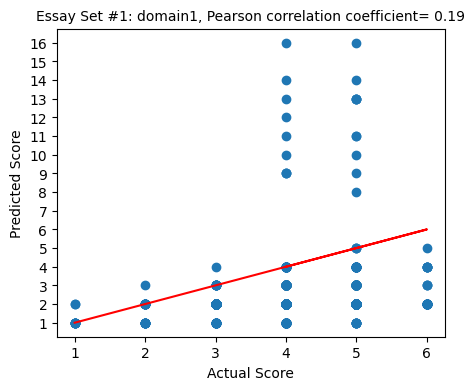

1726
1726
Essay Set #2: domain1
Spearman's rank correlation coefficient: 0.47
Pearson correlation coefficient: 0.49
p-value: 0.000


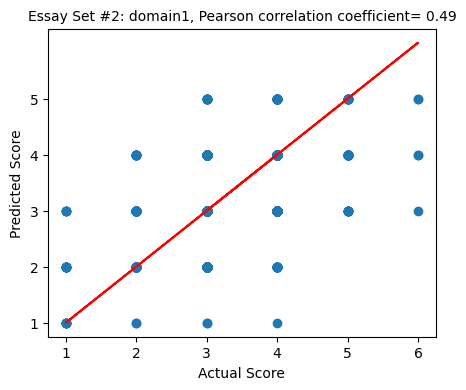

1562
1562
Essay Set #2: domain2
Spearman's rank correlation coefficient: 0.52
Pearson correlation coefficient: 0.54
p-value: 0.000


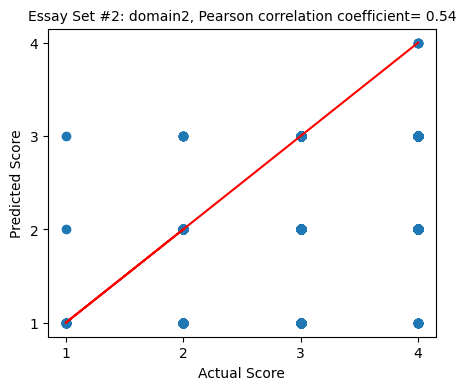

1691
1691
Essay Set #3: domain1
Spearman's rank correlation coefficient: 0.35
Pearson correlation coefficient: 0.35
p-value: 0.000


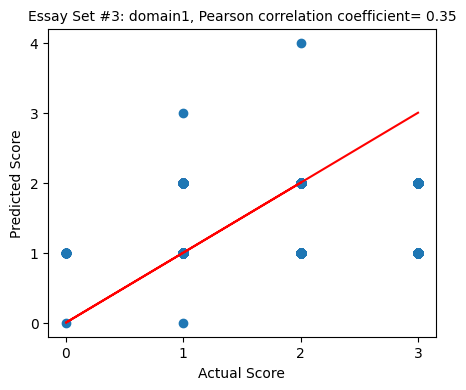

1732
1732
Essay Set #4: domain1
Spearman's rank correlation coefficient: 0.57
Pearson correlation coefficient: 0.56
p-value: 0.000


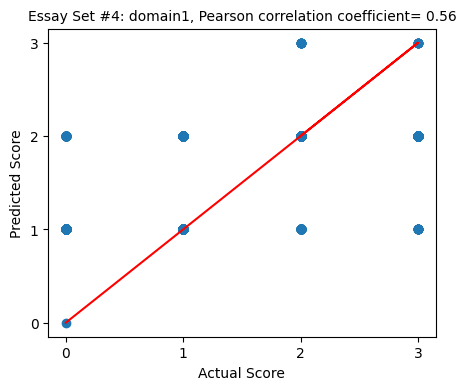

1804
1804
Essay Set #5: domain1
Spearman's rank correlation coefficient: 0.48
Pearson correlation coefficient: 0.51
p-value: 0.000


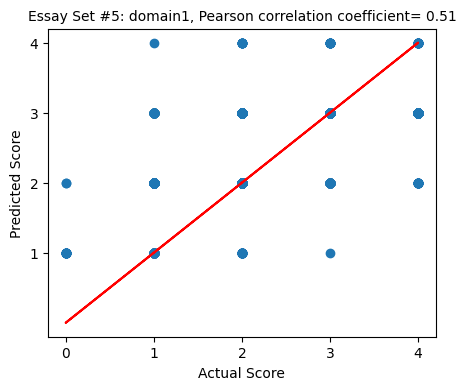

1775
1775
Essay Set #6: domain1
Spearman's rank correlation coefficient: 0.52
Pearson correlation coefficient: 0.59
p-value: 0.000


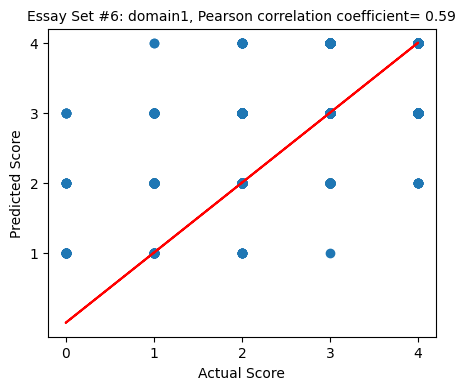

In [9]:
for essay_id in essay_ids:
    df = read_set(essay_id)
    for domain in domains:
        # domain = "Language Convensions"
        # Extract the actual and predicted scores as NumPy arrays
        if domain+'_Score_gpt' in df.columns:
            df.dropna(subset=[domain+'_Score_gpt'], inplace=True)
            df.dropna(subset=[domain+'_score'], inplace=True)
            print(len(df))
            print(len(df))
            title = "Essay Set #"+str(essay_id)+": "+domain
            print("Essay Set #"+str(essay_id)+": "+domain)    
            graph_path = data_path+"reports_graphs/EssaySet"+str(essay_id)+"_"+domain+"_"
            actual_scores = df[domain+'_score']
            predicted_scores = df[domain+'_Score_gpt']
            # Create a scatter plot of the actual vs predicted scores
            plot_pearson(actual_scores, predicted_scores, title, graph_path)

# code RMSE graph

In [10]:
def plot_rmse(actual_scores, predicted_scores, title, graph_path):
    # Calculate RMSE
    rmse = np.sqrt(np.mean((np.array(predicted_scores) - np.array(actual_scores))**2))
    plt.figure(figsize=(5,4))
    # Create scatter plot
    plt.scatter(actual_scores, predicted_scores, color='blue')

    # Add diagonal line of perfect prediction
    plt.plot([0, 5], [0, 5], color='red')

    # Add RMSE line
    plt.axhline(y=rmse, color='green')

    # Add labels and title
    plt.xlabel('Actual Scores')
    plt.xticks(range(int(actual_scores.min()), int(actual_scores.max()+1)))
    plt.yticks(range(int(predicted_scores.min()), int(predicted_scores.max()+1)))
    # plt.figure(figsize=(8,3))
    plt.ylabel('Predicted Scores')
    plt.title(f'{title}, RMSE = {rmse:.2f}', fontsize=10)
    plt.savefig(graph_path+"rmse.png")

    # Show plot
    plt.show()

## Graphs using loop

Essay Set #1: domain1


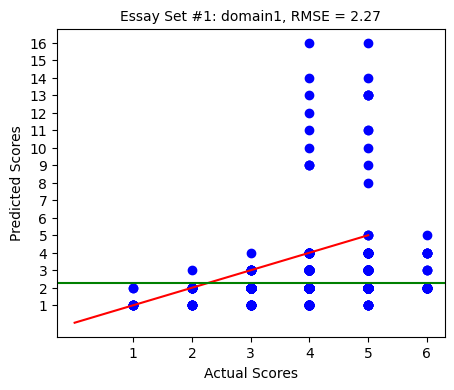

Essay Set #2: domain1


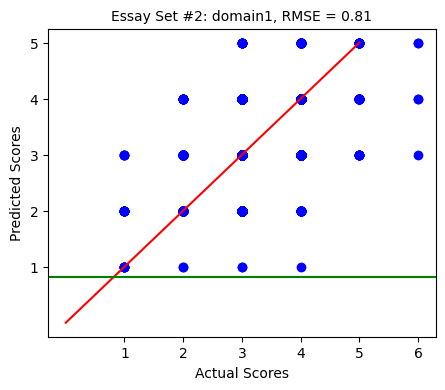

Essay Set #2: domain2


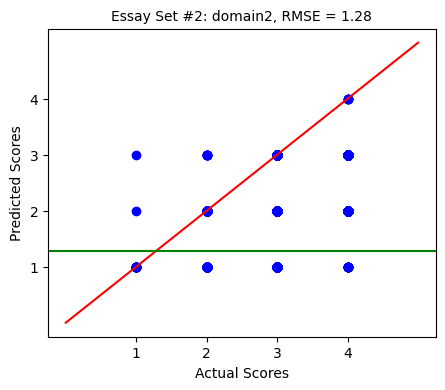

Essay Set #3: domain1


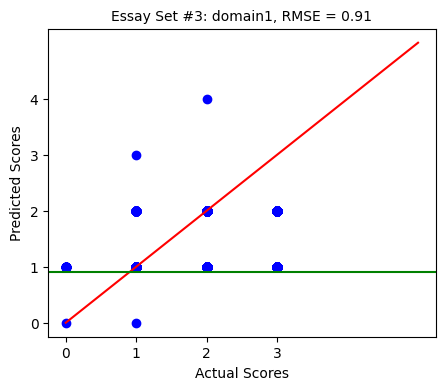

Essay Set #4: domain1


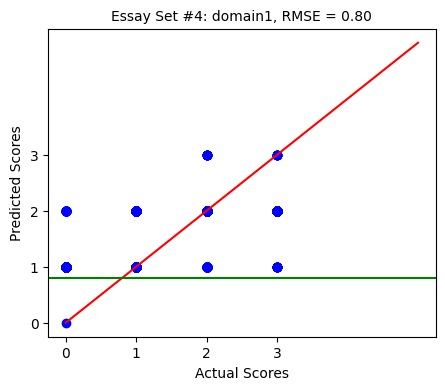

Essay Set #5: domain1


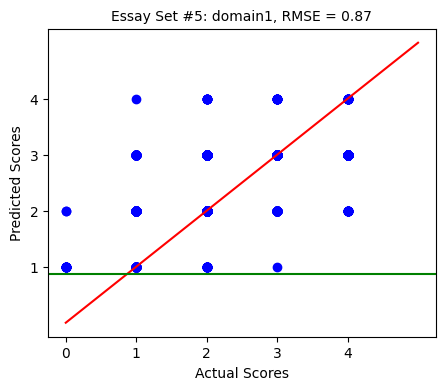

Essay Set #6: domain1


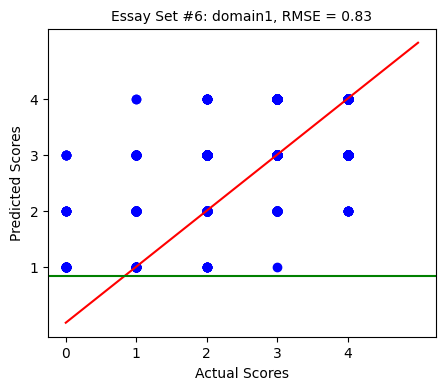

In [11]:
for essay_id in essay_ids:
    df = read_set(essay_id)
    for domain in domains:
        # domain = "Language Convensions"
        # Extract the actual and predicted scores as NumPy arrays
        if domain+'_Score_gpt' in df.columns:
            df.dropna(subset=[domain+'_Score_gpt'], inplace=True)
            df.dropna(subset=[domain+'_score'], inplace=True)
            title = "Essay Set #"+str(essay_id)+": "+domain
            print("Essay Set #"+str(essay_id)+": "+domain)
            
            graph_path = data_path+"reports_graphs/EssaySet"+str(essay_id)+"_"+domain+"_"
            actual_scores = df[domain+'_score']
            # print(actual_scores)
            predicted_scores = df[domain+'_Score_gpt']
            # Create a scatter plot of the actual vs predicted scores
            plot_rmse(actual_scores, predicted_scores, title, graph_path)

# Code for Box plot

In [12]:
def plot_box(actual_scores, predicted_scores, title, graph_path):
    plt.figure(figsize=(5,4))
    # Create a box plot for the scores
    plt.boxplot([actual_scores, predicted_scores], labels=['Actual', 'Predicted'])

    # Label the axes and add a title
    plt.xlabel('Scores')
    plt.ylabel('Score Scale')
    plt.title(title , fontsize=10)

    # Display the plot
    plt.show()


Essay Set #1: domain1


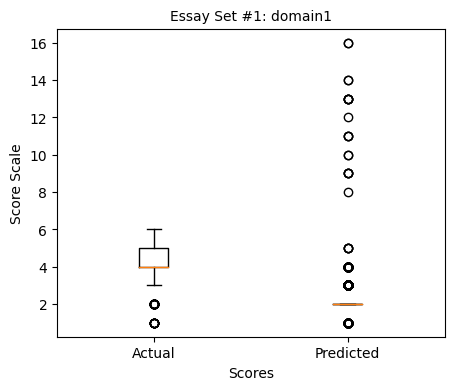

Essay Set #2: domain1


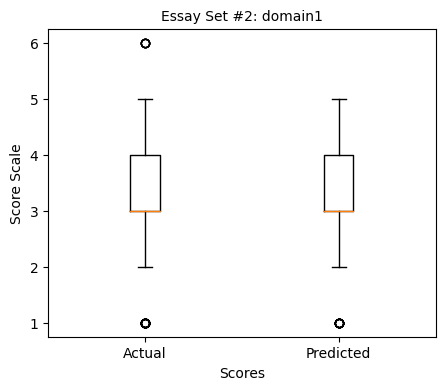

Essay Set #2: domain2


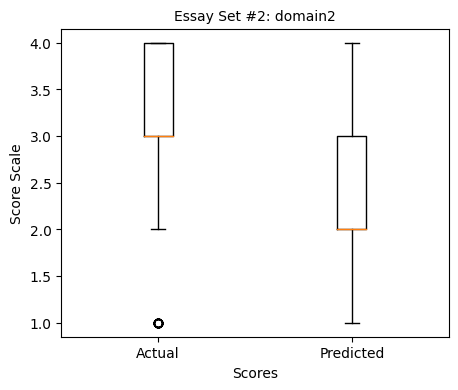

Essay Set #3: domain1


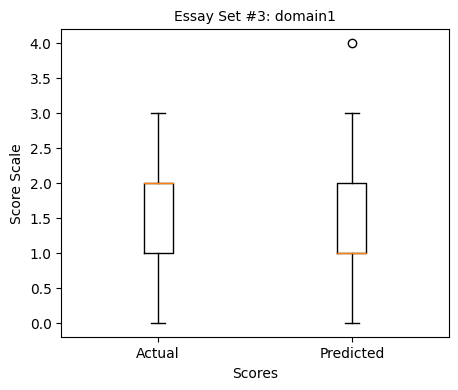

Essay Set #4: domain1


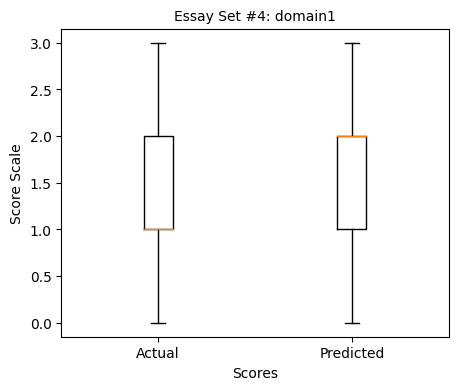

Essay Set #5: domain1


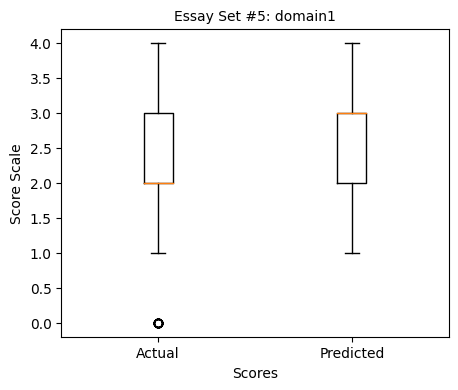

Essay Set #6: domain1


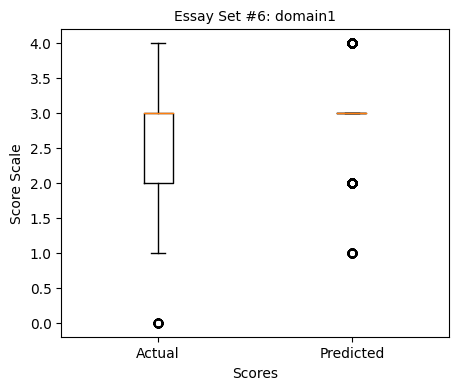

In [13]:
for essay_id in essay_ids:
    df = read_set(essay_id)
    for domain in domains:
        # domain = "Language Convensions"
        # Extract the actual and predicted scores as NumPy arrays
        if domain+'_Score_gpt' in df.columns:
            df.dropna(subset=[domain+'_Score_gpt'], inplace=True)
            df.dropna(subset=[domain+'_score'], inplace=True)
            title = "Essay Set #"+str(essay_id)+": "+domain
            print("Essay Set #"+str(essay_id)+": "+domain)
            
            graph_path = data_path+"reports_graphs/EssaySet"+str(essay_id)+"_"+domain+"_"
            actual_scores = df[domain+'_score']
            
            predicted_scores = df[domain+'_Score_gpt']
            # Create a box plot
            plot_box(actual_scores, predicted_scores, title, graph_path)

# Other Graphs

In [14]:

# Create a line plot of actual and predicted scores
def plot_line(actual_scores, predicted_scores, title, graph_path):
    plt.figure(figsize=(5,4))
    plt.plot(actual_scores, label='Actual Score')
    plt.plot(predicted_scores, label='Predicted Score')
    plt.xlabel('Data Point')
    plt.ylabel('Score')
    plt.yticks(range(int(actual_scores.min()), int(actual_scores.max()+1)))
    plt.title(title, fontsize=10)
    plt.legend()
    # Adjust the plot layout to prevent labels from overlapping with the border
    plt.tight_layout()
    plt.savefig(graph_path+"line.png")
    plt.show()
# Create a histogram of the differences


def plot_bar(actual_scores, predicted_scores, title, graph_path):
    difference = abs(actual_scores-predicted_scores)
    # print(len(df['Score Difference']))
    plt.figure(figsize=(5,4))
    n, bins, patches = plt.hist(difference, bins=5)
    # Add labels and title
    plt.xlabel('Score Difference')
    plt.ylabel('Frequency')
    # plt.xlim(left=0, right=5)
    plt.title(title, fontsize=10)
    plt.tight_layout()
    plt.xticks(range(int(difference.min()), int(difference.max()+1)))
    for i in range(len(patches)):
        plt.annotate(str(int(n[i])), xy=(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height()),
                 xytext=(0, 7), textcoords='offset points', ha='center', va='bottom')
    # Show the plot
    # Adjust the plot layout to prevent labels from overlapping with the border
    # plt.gca().invert_yaxis()
    # Adjust the plot layout to prevent labels from overlapping with the border
    plt.savefig(graph_path+"bar.png")
    plt.show()

Essay Set #1: domain1


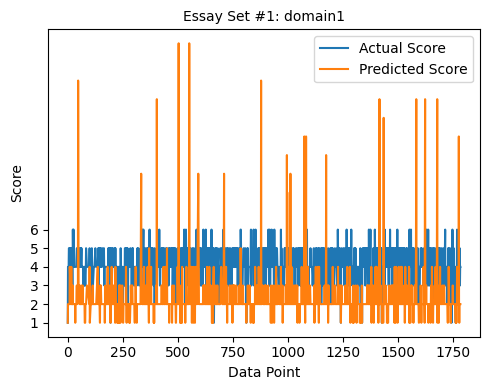

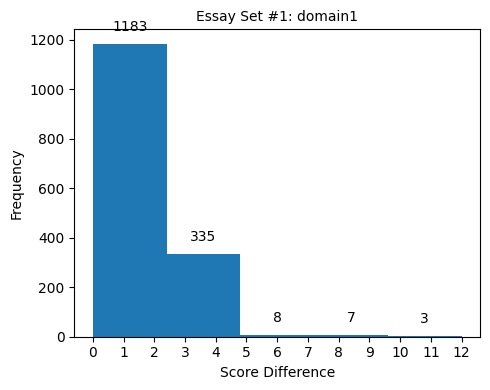

Essay Set #2: domain1


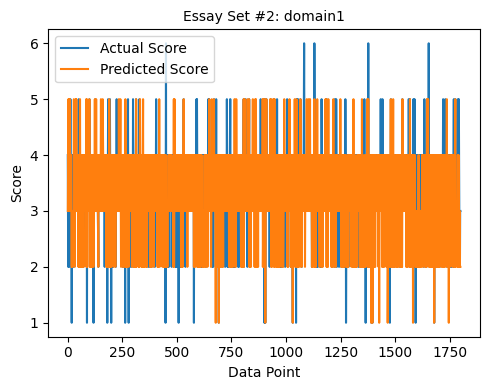

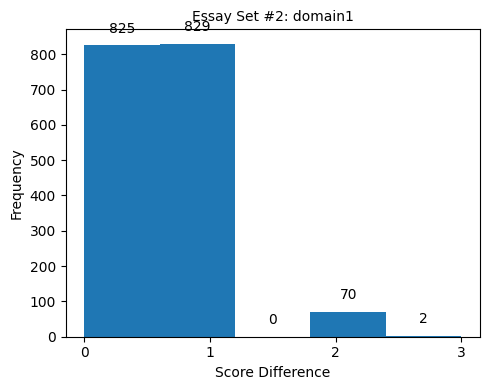

Essay Set #2: domain2


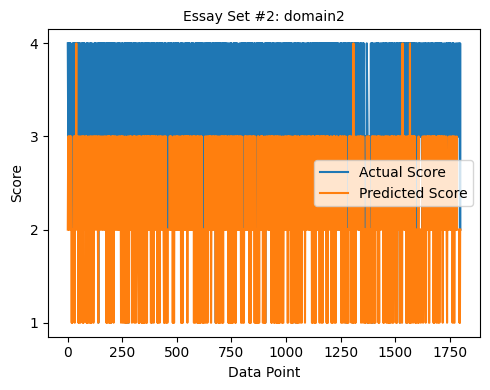

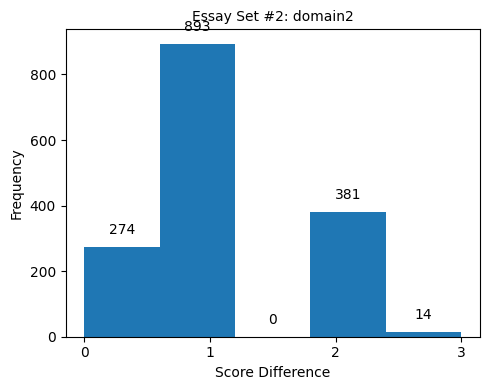

Essay Set #3: domain1


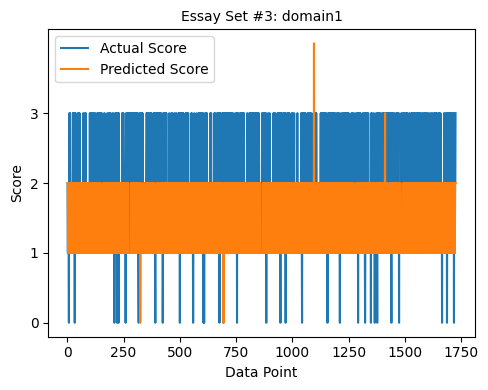

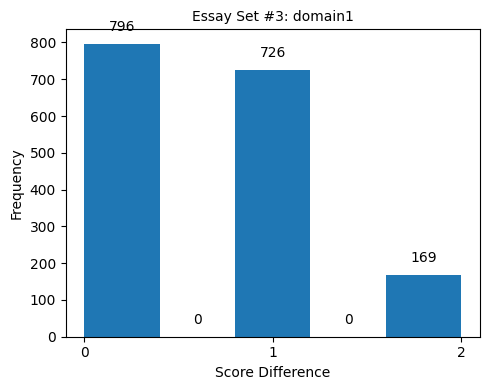

Essay Set #4: domain1


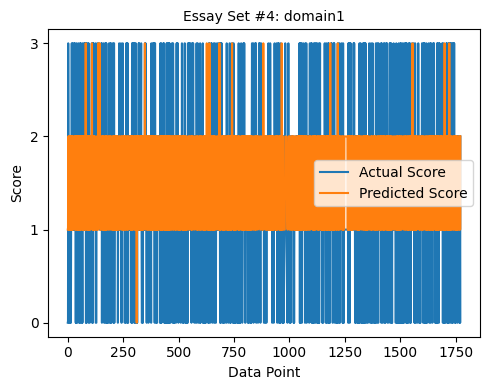

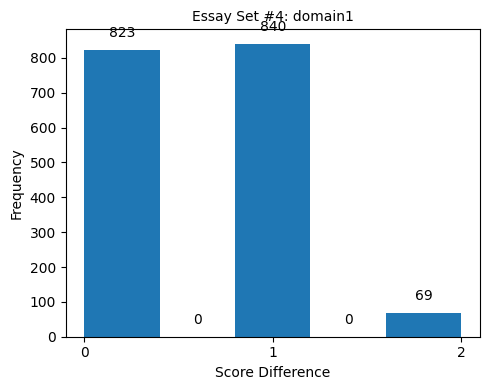

Essay Set #5: domain1


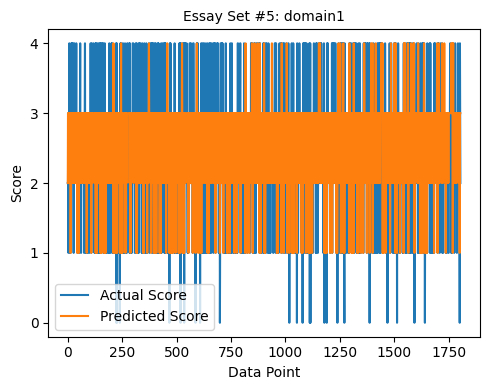

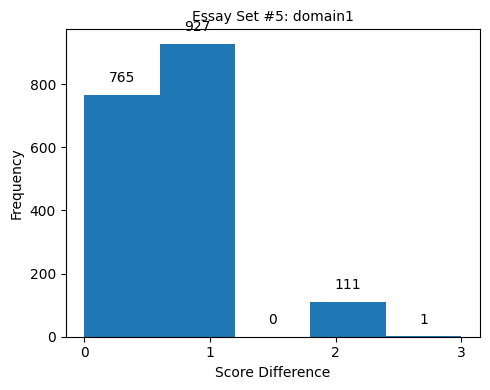

Essay Set #6: domain1


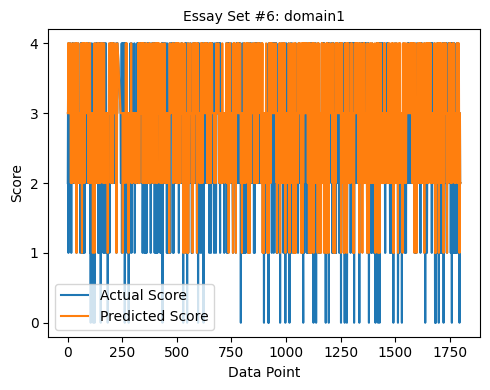

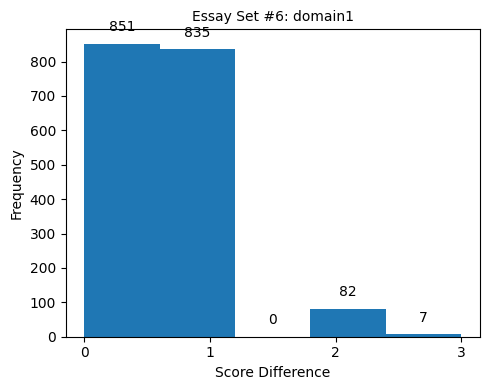

In [15]:
for essay_id in essay_ids:
    df = read_set(essay_id)
    for domain in domains:
        # domain = "Language Convensions"
        # Extract the actual and predicted scores as NumPy arrays
        if domain+'_Score_gpt' in df.columns:
            df.dropna(subset=[domain+'_Score_gpt'], inplace=True)
            df.dropna(subset=[domain+'_score'], inplace=True)
            title = "Essay Set #"+str(essay_id)+": "+domain
            print("Essay Set #"+str(essay_id)+": "+domain)
            
            graph_path = data_path+"reports_graphs/EssaySet"+str(essay_id)+"_"+domain+"_"
            actual_scores = df[domain+'_score']
            # print(actual_scores)
            predicted_scores = df[domain+'_Score_gpt']
            plot_line(actual_scores, predicted_scores, title, graph_path)
            plot_bar(actual_scores, predicted_scores, title, graph_path)